# 神经网络 

## 1多分类 

这次我们需要实现手写数字（0到9）的识别。这需要我们扩展之前的逻辑回归，并将其应用于一对多的分类。

### 数据集

这是给了我们一个MATLAB格式的.m文件，其中包含5000个20*20像素的手写字体图像，以及他对应的数字。  
用Python读取该格式数据我们需要使用SciPy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from scipy.io import loadmat
from sklearn.metrics import classification_report 


In [2]:
data = loadmat('ex3data1.mat')
data


{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [3]:
data['X'].shape , data['y'].shape

((5000, 400), (5000, 1))

###  1.2数据可视化

In [4]:
sample_idx = np.random.choice( np.arange(data['X'].shape[0]), 100)
sample_images = data['X'][sample_idx]
sample_images


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

上面随机选择一些图片用于展示  
下面将其可视化

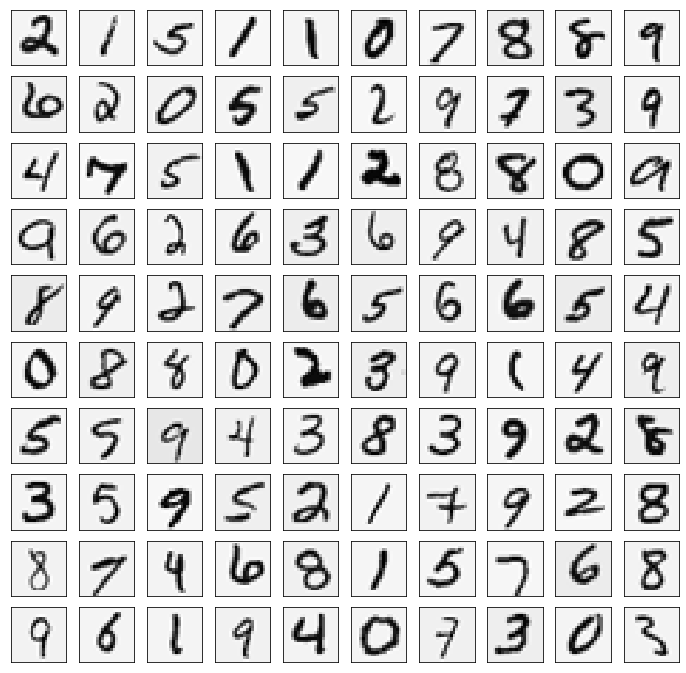

In [5]:
fig , ax_array = plt.subplots( nrows=10 , ncols=10 , sharey=True , sharex =True , figsize=(12,12) )

for r in range(10): 
    for c in range(10): 
        ax_array[r,c].matshow( np.array( sample_images[10*r+c].reshape( (20,20) ) ).T  , cmap = matplotlib.cm.binary )
        plt.xticks( np.array([]) )
        plt.yticks( np.array([]) )
        

###  1.3逻辑回归向量化

#### 1.3.1向量化代价函数

# sigmoid 函数
g 代表一个常用的逻辑函数（logistic function）为S形函数（Sigmoid function），公式为：
$$
g( z )=\frac{1}{1+{{e}^{-z}}}
$$
合起来，我们得到逻辑回归模型的假设函数：
$$
{{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}}
$$ 

In [6]:
def sigmoid(z): 
    return 1/( 1+np.exp(-z) )


代价函数：
$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}$ 

In [7]:
# 代价函数实现
def cost( theta , X , y , learningRate ): 
    theta = np.matrix(theta) 
    X = np.matrix(X)
    y = np.matrix(y) 
    
    first = np.multiply( -y , np.log( sigmoid(X * theta.T) ) )
    second = np.multiply( (1-y) , np.log( 1-sigmoid(X*theta.T) ) )
    
    reg = (learningRate/(2*len(X))) * np.sum( np.power( theta[: , 1:theta.shape[1]] , 2 ) )
    
    
    return np.sum(first-second)/len(y) + reg
    

In [8]:
data['X'].shape , data['y'].shape   # X 每一行为一个示例，

((5000, 400), (5000, 1))

#### 1.3.2向量化梯度

没正则化的时候，逻辑回归的代价是一个向量，第j个元素定义如下：
$$
\frac{\partial J}{\partial {\theta }_{j}}=\frac{1}{m}\sum\limits_{i=1}^{m}\left({({{h}_{\theta }}( {{x}^{(i)}})-{{y}^{(i)}})x_j^{(i)}} \right)
$$
想要正则化它，我们先把他每一行都写出来

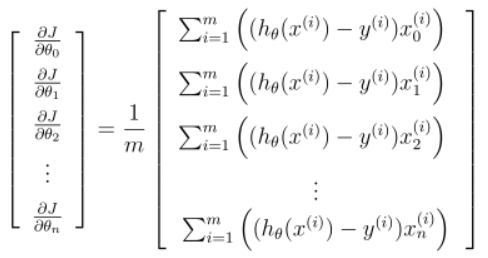

$$
=\frac{1}{m}\sum\limits_{i=1}^{m}\left({({{h}_{\theta }}( {{x}^{(i)}})-{{y}^{(i)}})x^{(i)}} \right)
$$

$$
=\frac{1}{m}X^T(h_\theta(x)-y)
$$

其中

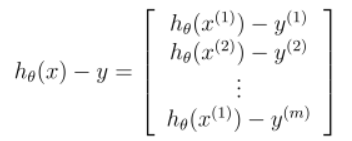


记住，$x^{(i)}$是一个向量，但$(h_\theta(x^{(i)})-y^{(i)})$是一个数字

要理解前面式子的最后一步，我们令$\beta_i=(h_\theta(x^{(i)})-y^{(i)})$。于是我们可以得出如下等式

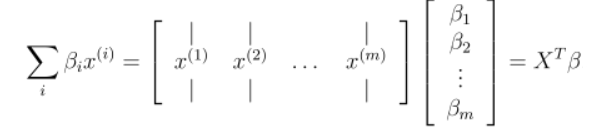

$\sum\limits_i\beta_ix^{(i)}$是$n*1$的向量，与一开始等式左边$\frac{\partial J}{\partial {\theta }_{n}}$的$n*1$向量对应，$X^T$后为$n*m$，$\beta_m$的列向量是$m*1$,二者相乘之后是$n*1$

建议在草稿纸上画一画上面的计算过程

#### 1.3.3向量化正则化逻辑回归

梯度更新公式如下：
$$
{{\theta }_{0}}:={{\theta }_{0}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}( {{x}^{(i)}} )-{{y}^{(i)}})x_{_{0}}^{(i)}} 
$$
$$
{{\theta }_{j}}:={{\theta }_{j}}-a(\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}( {{x}^{(i)}} )-{{y}^{(i)}})x_{j}^{(i)}}+\frac{\lambda }{m}{{\theta }_{j}})
$$
向量化后的梯度更新公式如下：
$$
{{\theta }_{0}}:={{\theta }_{0}}-a\frac{1}{m}(h_\theta(x)-y)\cdot x_{_{0}}
$$
$$
{{\theta }_{j}}:={{\theta }_{j}}-a(\frac{1}{m}X^T(h_\theta(x)-y)+\frac{\lambda }{m}{{\theta }_{j}})
$$


In [9]:
def gradient(theta , X , y , learningRate): 
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int( theta.ravel().shape[1] )
    error = sigmoid( X* theta.T ) - y
    
    grad = ( (X.T * error) / len(X)  ).T + ( (learningRate / len(X) ) * theta)
    
    
    grad[0 , 0] = np.sum( np.multiply( error , X[: , 0] ) ) / len(X)  # theta0 不需要正则化
    
    
    return np.array(grad).ravel()
    

###  1.4一对多分类器

ok，现在我们已经定义了代价函数和梯度函数，下一步是构建分类器。
对于这个任务，由于我们有10个可能的类，并且由于逻辑回归只能一次在2个类之间进行分类，所以我们需要多类分类的策略。
在本练习中，我们的任务是实现一对一全分类方法，其中具有k个不同类的标签就有k个分类器，每个分类器在“是 i”和“不是 i”之间决定。
我们将把分类器训练包含在一个函数中，该函数计算10个分类器中的每个分类器的最终权重，并将权重返回为k*(n + 1)数组，其中n是参数数量。 k为分类数目。这里是10

In [10]:
from scipy.optimize import minimize

def one_vs_all(X , y , num_label , learning_rate): 
    
    rows = X.shape[0]
    params = X.shape[1]
    
    # 初始化全为0的参数矩阵  shape=（k，n+1）
    all_theta = np.zeros( (num_label , params+1) )
    
    # 插入theta0项
    X = np.insert( X , 0 , values=np.ones(rows) , axis =1 )
    
    # 分类从1-k 不使用0 
    for i in range(1,num_label+1): 
        theta = np.zeros(params+1)
        y_i = np.array( [1 if label == i else 0 for label in y ]  )
        y_i = np.reshape(y_i , (rows ,1))
        
        # 使用工具库函数，利用已经定义好的函数最小化代价
        fmin = minimize( fun=cost , x0= theta , args=( X , y_i , learning_rate ) , method='TNC' , jac=gradient )
        all_theta[i-1,:] = fmin.x
        
        
    return all_theta
        

这里需要注意的几点 ：  
首先，我们为theta添加了一个额外的参数（与训练数据一列），以计算截距项（常数项）。  
其次，我们将y从类标签转换为每个分类器的二进制值（要么是类i，要么不是类i）。   
最后，我们使用SciPy的较新优化API来最小化每个分类器的代价函数。 如果指定的话，API将采用目标函数，初始参数集，优化方法和jacobian（渐变）函数。 然后将优化程序找到的参数分配给参数数组。

实现向量化代码的一个更具挑战性的部分是正确地写入所有的矩阵，保证维度正确。  
所以建议先手动算一遍，确保每一步的矩阵维度无误

In [11]:
rows = data['X'].shape[0]
params = data['X'].shape[1]

all_theta = np.zeros( ( 10 ,params+1) )

X = np.insert( data['X'] , 0 , values=np.ones(rows) , axis=1 )

theta = np.zeros(params+1)

y_0 = np.array( [1 if label ==0 else 0 for label in data['y']] )
y_0 = np.reshape( y_0 , (rows , 1) )

X.shape , y_0.shape , theta.shape , all_theta.shape


((5000, 401), (5000, 1), (401,), (10, 401))

检查一下我们的分类标签，确保与预期相符

In [12]:
np.unique( data['y'] )

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

In [13]:
all_theta = one_vs_all(data['X'] , data['y'] , 10 ,1)
all_theta


array([[-2.38254176e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.30426303e-03, -7.17245139e-10,  0.00000000e+00],
       [-3.18255097e+00,  0.00000000e+00,  0.00000000e+00, ...,
         4.46037881e-03, -5.08528248e-04,  0.00000000e+00],
       [-4.79725016e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.87026543e-05, -2.47433759e-07,  0.00000000e+00],
       ...,
       [-7.98553657e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -8.95420362e-05,  7.21788914e-06,  0.00000000e+00],
       [-4.57378972e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.33558726e-03,  9.98591236e-05,  0.00000000e+00],
       [-5.40484816e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.16513518e-04,  7.86318240e-06,  0.00000000e+00]])

####  1.4.1 一对多预测

In [14]:
# 预测函数
def predict_all(X , all_theta): 
    rows = X.shape[0]
    params = X.shape[1]
    num_labels = all_theta.shape[0]
    
    # 插入theta0 = 1 
    X = np.insert(X , 0 ,values=np.ones(rows) , axis=1 )

    # 转换矩阵
    X = np.matrix(X)
    all_theta = np.matrix(all_theta)
    
    # 计算各分类的概率
    h = sigmoid(X * all_theta.T)
    
    # 找到概率最高的预测 
    h_argmax = np.argmax( h , axis=1 )
    
    # 0-9  -> 1-10
    h_argmax = h_argmax + 1

    return h_argmax


现在我们可以使用predict_all函数为每个实例生成类预测，看看我们的分类器是如何工作的。

In [15]:
y_pred = predict_all( data['X'] , all_theta )
print(classification_report( data['y'] , y_pred ))

              precision    recall  f1-score   support

           1       0.95      0.99      0.97       500
           2       0.95      0.92      0.93       500
           3       0.95      0.91      0.93       500
           4       0.95      0.95      0.95       500
           5       0.92      0.92      0.92       500
           6       0.97      0.98      0.97       500
           7       0.95      0.95      0.95       500
           8       0.93      0.92      0.92       500
           9       0.92      0.92      0.92       500
          10       0.97      0.99      0.98       500

    accuracy                           0.94      5000
   macro avg       0.94      0.94      0.94      5000
weighted avg       0.94      0.94      0.94      5000





## 2 神经网络
在前面一个部分，我们已经实现了多分类逻辑回归来识别手写数字。但是，逻辑回归并不能承载更复杂的假设，因为他就是个线性分类器。
这部分，你需要实现一个可以识别手写数字的神经网络。神经网络可以表示一些非线性复杂的模型。权重已经预先训练好，你的目标是在现有权重基础上，实现前馈神经网络。
### 2.1 模型表达
现有模型图示如下

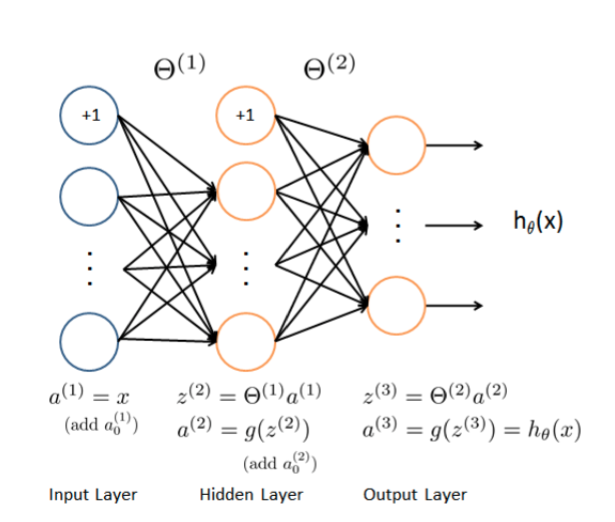

输入是图片的像素值，20*20像素的图片有400个输入层单元，不包括需要额外添加的加上常数项。
材料已经提供了训练好的神经网络的参数$\Theta ^{(1)}$,$\Theta^{(2)}$，有25个隐层单元和10个输出单元（10个输出）

###  2.2 前馈神经网络和预测

这里参数已经给了我们，需要实现前馈神经网络预测手写数字的功能。和之前的一对多分类一样，神经网络的预测也是把$(h_\theta(x))_k$中值最大的，作为预测输出

In [16]:
weight = loadmat('ex3weights.mat')
theta1 , theta2 = weight['Theta1'] , weight['Theta2']
theta1.shape , theta2.shape

((25, 401), (10, 26))

In [17]:
X2 = np.matrix(np.insert(data['X'] , 0 , values=np.ones(X.shape[0]) , axis=1)) # 这里对应上图的'+1'
y2 = np.matrix(data['y'])
X2.shape , y2.shape


((5000, 401), (5000, 1))

In [18]:
a1 = X2 
z2 = a1 * theta1.T
z2.shape

(5000, 25)

In [19]:
a2 = sigmoid(z2)
a2.shape

(5000, 25)

In [20]:
a2 = np.insert(a2 , 0 ,values=np.ones(a2.shape[0]) ,axis=1)
z3 = a2 * theta2.T 
z3.shape

(5000, 10)

In [21]:
a3 = sigmoid(z3)
a3

matrix([[1.12661530e-04, 1.74127856e-03, 2.52696959e-03, ...,
         4.01468105e-04, 6.48072305e-03, 9.95734012e-01],
        [4.79026796e-04, 2.41495958e-03, 3.44755685e-03, ...,
         2.39107046e-03, 1.97025086e-03, 9.95696931e-01],
        [8.85702310e-05, 3.24266731e-03, 2.55419797e-02, ...,
         6.22892325e-02, 5.49803551e-03, 9.28008397e-01],
        ...,
        [5.17641791e-02, 3.81715020e-03, 2.96297510e-02, ...,
         2.15667361e-03, 6.49826950e-01, 2.42384687e-05],
        [8.30631310e-04, 6.22003774e-04, 3.14518512e-04, ...,
         1.19366192e-02, 9.71410499e-01, 2.06173648e-04],
        [4.81465717e-05, 4.58821829e-04, 2.15146201e-05, ...,
         5.73434571e-03, 6.96288990e-01, 8.18576980e-02]])

In [22]:
y_pred2 = np.argmax(a3 , axis=1)+1  # 生成预测结果
y_pred2.shape

(5000, 1)

看下工作情况

In [23]:
print(classification_report(y2 , y_pred2))

              precision    recall  f1-score   support

           1       0.97      0.98      0.98       500
           2       0.98      0.97      0.98       500
           3       0.98      0.96      0.97       500
           4       0.97      0.97      0.97       500
           5       0.97      0.98      0.98       500
           6       0.98      0.99      0.98       500
           7       0.98      0.97      0.97       500
           8       0.98      0.98      0.98       500
           9       0.97      0.96      0.96       500
          10       0.98      0.99      0.99       500

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000



下一节，我们将自己动手实现神经网络的各个组成部分，并自己训练一个0-9手写数字分类器